<a href="https://colab.research.google.com/github/ASD-Are/Cloud-Computing/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Aron Sbhatu Dagniew
# ID: 20073
# Week 9 Homework 1: Machine Learning on Colab

## Step 1: Create a Colab project from scratch
Source code: https://github.com/MynameisKoi/CS550/blob/main/knn.ipynb

### Step 1.1.: Open Google and then open Google Colab

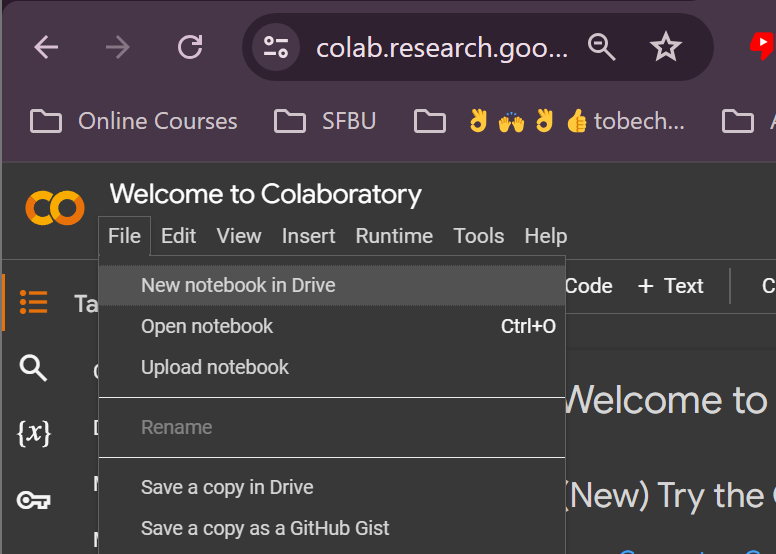

### Step 1.2. Rename the ipynp file as knn.ipynb
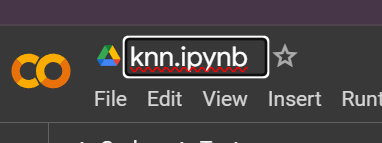

In [12]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()  # Add this line
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20.0, 10.0)

This code prepares a Google Colab notebook for a machine learning task. It imports necessary libraries for calculations, machine learning, and creating graphs. It also sets up the look of the graphs and makes them bigger. Finally, it hides warning messages to keep the notebook output tidy.

Select the + Code from menu and add the following codes

Create Synthetic data

In [13]:
num_points_each_cluster = 100
mu1 = [-0.4, 3]
covar1 = [[1.3,0],[0,1]]
mu2 = [0.5, 0.75]
covar2 = [[2.2,1.2],[1.8,2.1]]
X1 = np.random.multivariate_normal(mu1, covar1, num_points_each_cluster)
X2 = np.random.multivariate_normal(mu2, covar2, num_points_each_cluster)
y1 = np.ones(num_points_each_cluster)
y2 = np.zeros(num_points_each_cluster)

This code creates two groups of artificial data points for a machine learning task. Each group has 100 points and is shaped like a cloud with a center point. The first group is centered at (-0.4, 3) and the second group at (0.5, 0.75). Each point also gets a label, with the first group labeled as "1" and the second group as "0".

Lets try to Run all the lines

Let's visualize this data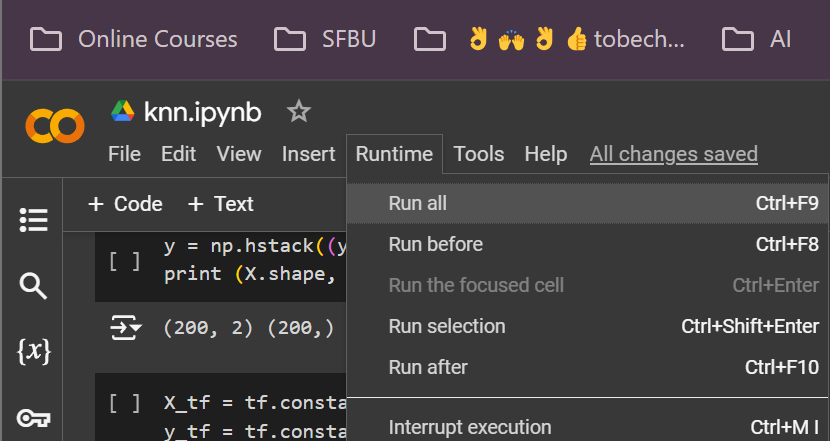

### Step 1.3. Follow this procedure . to complete the lab.

### Step 1.4. Download as knn.ipynb or knn.**py**

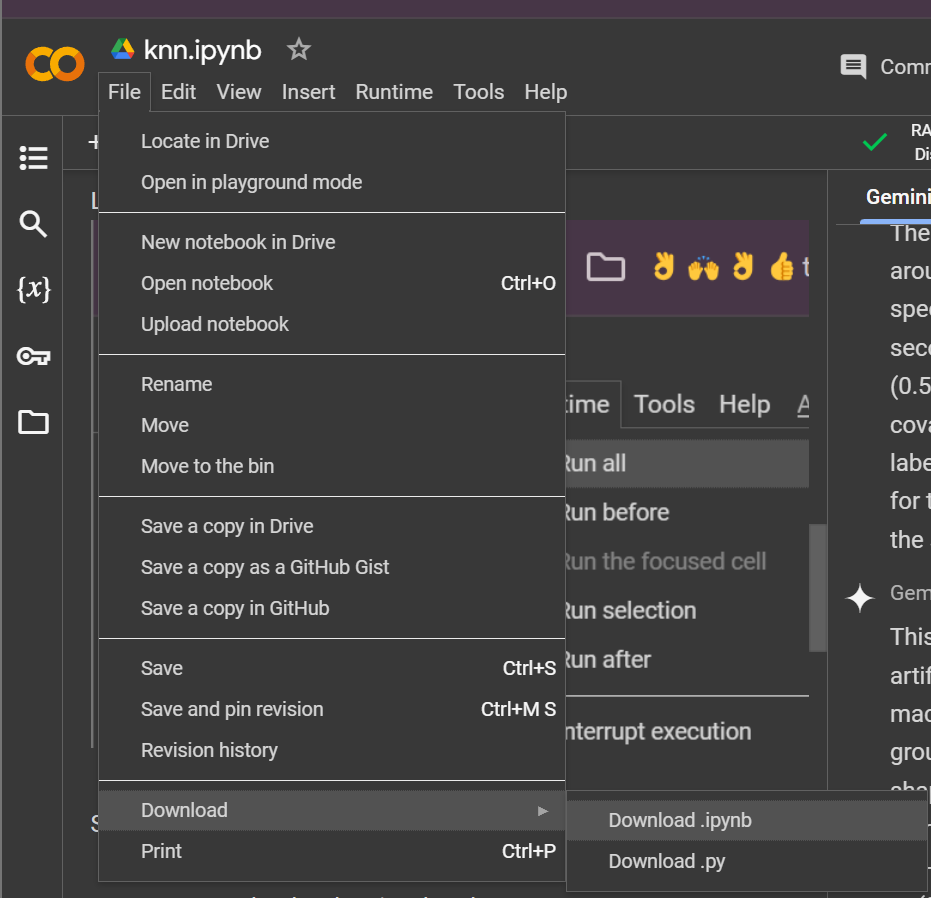

Add the following code and try to explore them

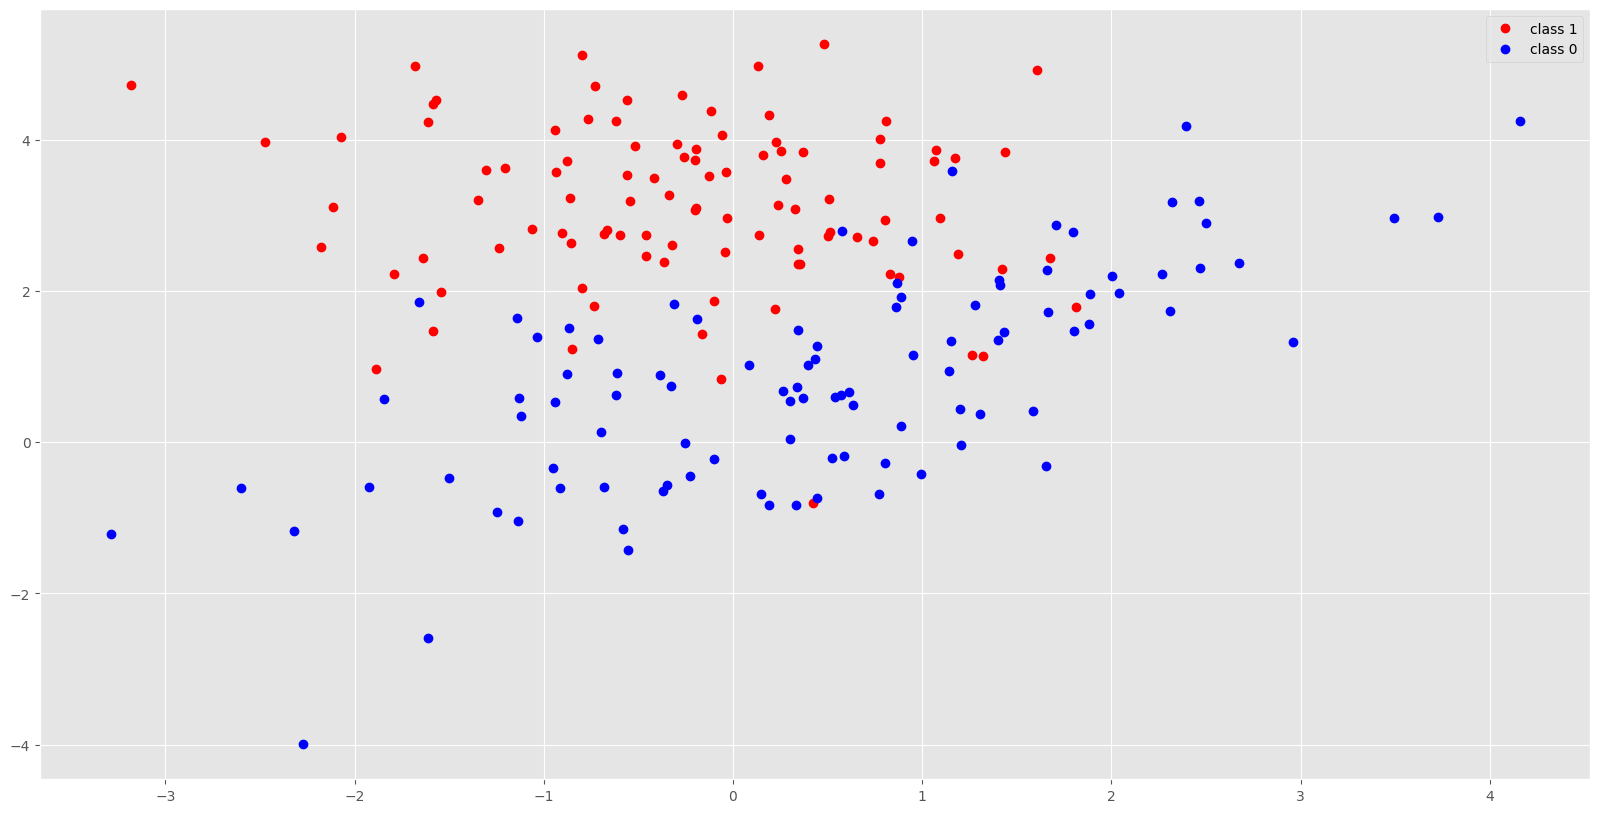

In [14]:
plt.plot( X1[:, 0], X1[:,1], 'ro', label='class 1')
plt.plot(X2[:, 0], X2[:,1], 'bo', label='class 0')
plt.legend(loc='best')
plt.show()

This code creates a scatter plot to visualize the two groups of data points. The first group is shown as red circles, and the second group is shown as blue circles. A legend is automatically placed in the best position to label the two groups, and the plot is displayed.

In [15]:
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))
print (X.shape, y.shape)

(200, 2) (200,)


In [16]:
X_tf = tf.constant(X)
y_tf = tf.constant(y)

- Convert X and y into TensorFlow constants X_tf and y_tf.

Main logic for KNN

In [17]:
def predict(X_t, y_t, x_t, k_t):
    neg_one = tf.constant(-1.0, dtype=tf.float64)
    # we compute the L-1 distance
    distances =  tf.reduce_sum(tf.abs(tf.subtract(X_t, x_t)), 1)
    # to find the nearest points, we find the farthest points based on negative distances
    # we need this trick because tensorflow has top_k api and no closest_k or reverse=True api
    neg_distances = tf.multiply(distances, neg_one)
    # get the indices
    vals, indx = tf.nn.top_k(neg_distances, k_t)
    # slice the labels of these points
    y_s = tf.gather(y_t, indx)
    return y_s


def get_label(preds):
    counts = np.bincount(preds.astype('int64'))
    return np.argmax(counts)

1. **Inputs**:
   - `X_t`: Training data.
   - `y_t`: Labels for training data.
   - `x_t`: Test data point.
   - `k_t`: Number of nearest neighbors.
   
2. **L-1 Distance**: Calculate the Manhattan distance between `x_t` and each point in `X_t`.

3. **Top-k Nearest**:
   - Convert distances to negative to use TensorFlow's `top_k` API to find the nearest points.
   - Get indices of the `k_t` nearest points.
   - Retrieve labels of these points using `tf.gather`.

- **Label Calculation**:
  - Count the occurrences of each label in `preds`.
  - Return the label with the highest count.


Generate a test point

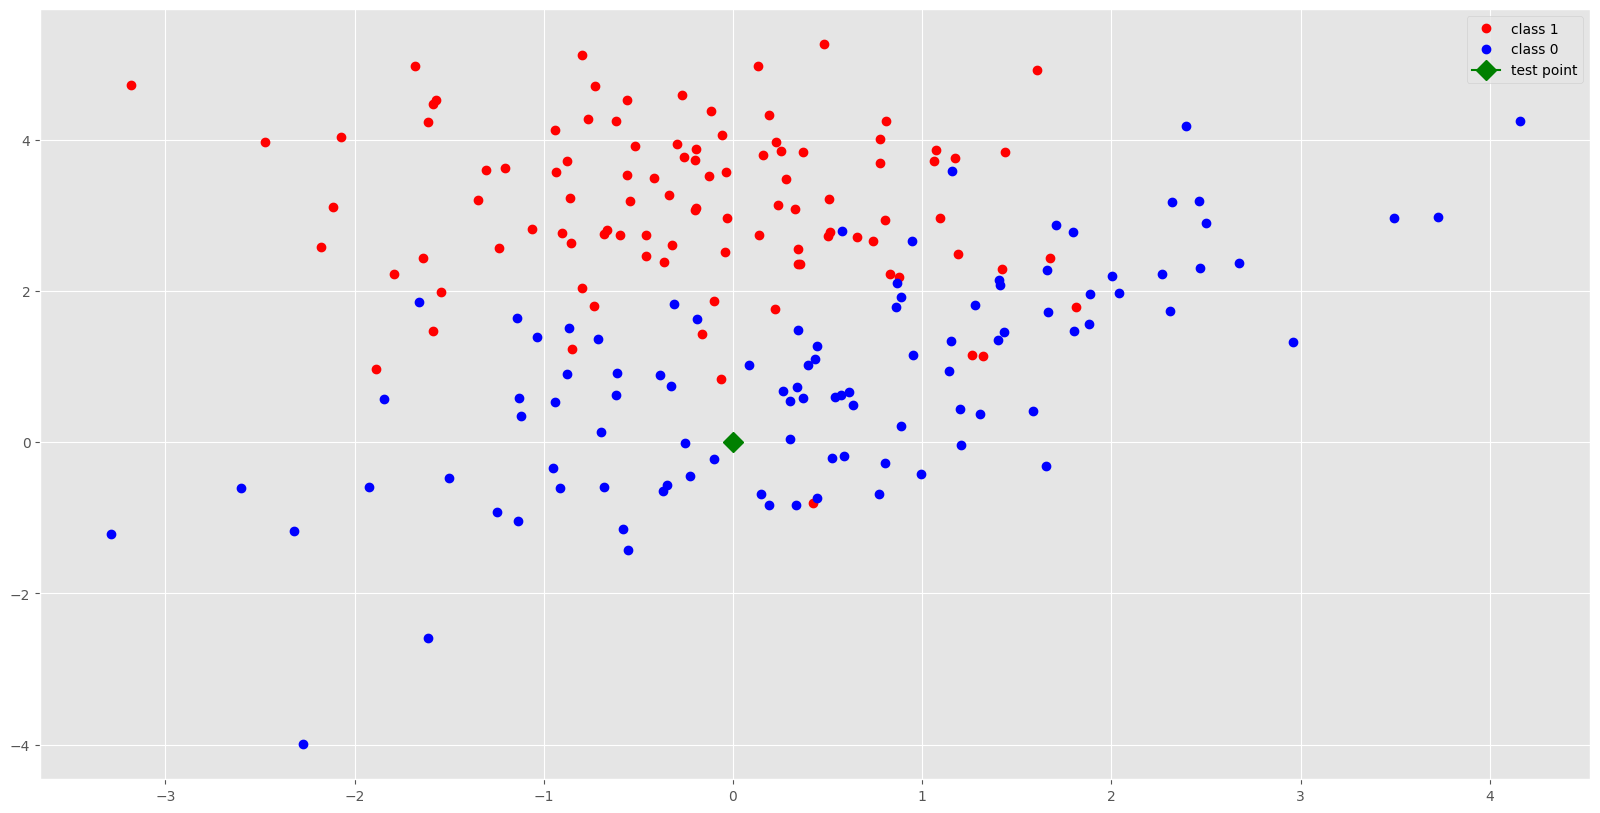

In [18]:
example = np.array([0, 0])
example_tf = tf.constant(example,dtype=tf.float64)

plt.plot( X1[:, 0], X1[:,1], 'ro', label='class 1')
plt.plot(X2[:, 0], X2[:,1], 'bo', label='class 0')
plt.plot(example[0], example[1], 'g', marker='D', markersize=10, label='test point')
plt.legend(loc='best')
plt.show()


1. **Test Point**:
   - Define a test point `example` at `[0, 0]` and convert it to a TensorFlow constant `example_tf`.
   
2. **Plot**:
   - Plot the data points and the test point.
   - Use green diamond marker (`'g', marker='D'`) for the test point.

In [19]:
k_tf = tf.constant(3)
tf.disable_v2_behavior()
with tf.compat.v1.Session() as sesss:
   pr = predict(X_tf, y_tf, example_tf, k_tf)
   sess = tf.compat.v1.Session()
   y_index = sess.run(pr)
   print (get_label(y_index))
   # print(sess.run(pr))

0



1. **K Value**: Set `k` to 3 and create a TensorFlow constant `k_tf`.

2. **TensorFlow Session**:
   - Disable TensorFlow v2 behavior for compatibility.
   - Start a TensorFlow session.
   - Run the `predict` function to get the labels of the `k` nearest neighbors.
   - Use `sess.run` to execute the computation graph and retrieve the nearest neighbor labels.
   - Print the predicted label for the test point.



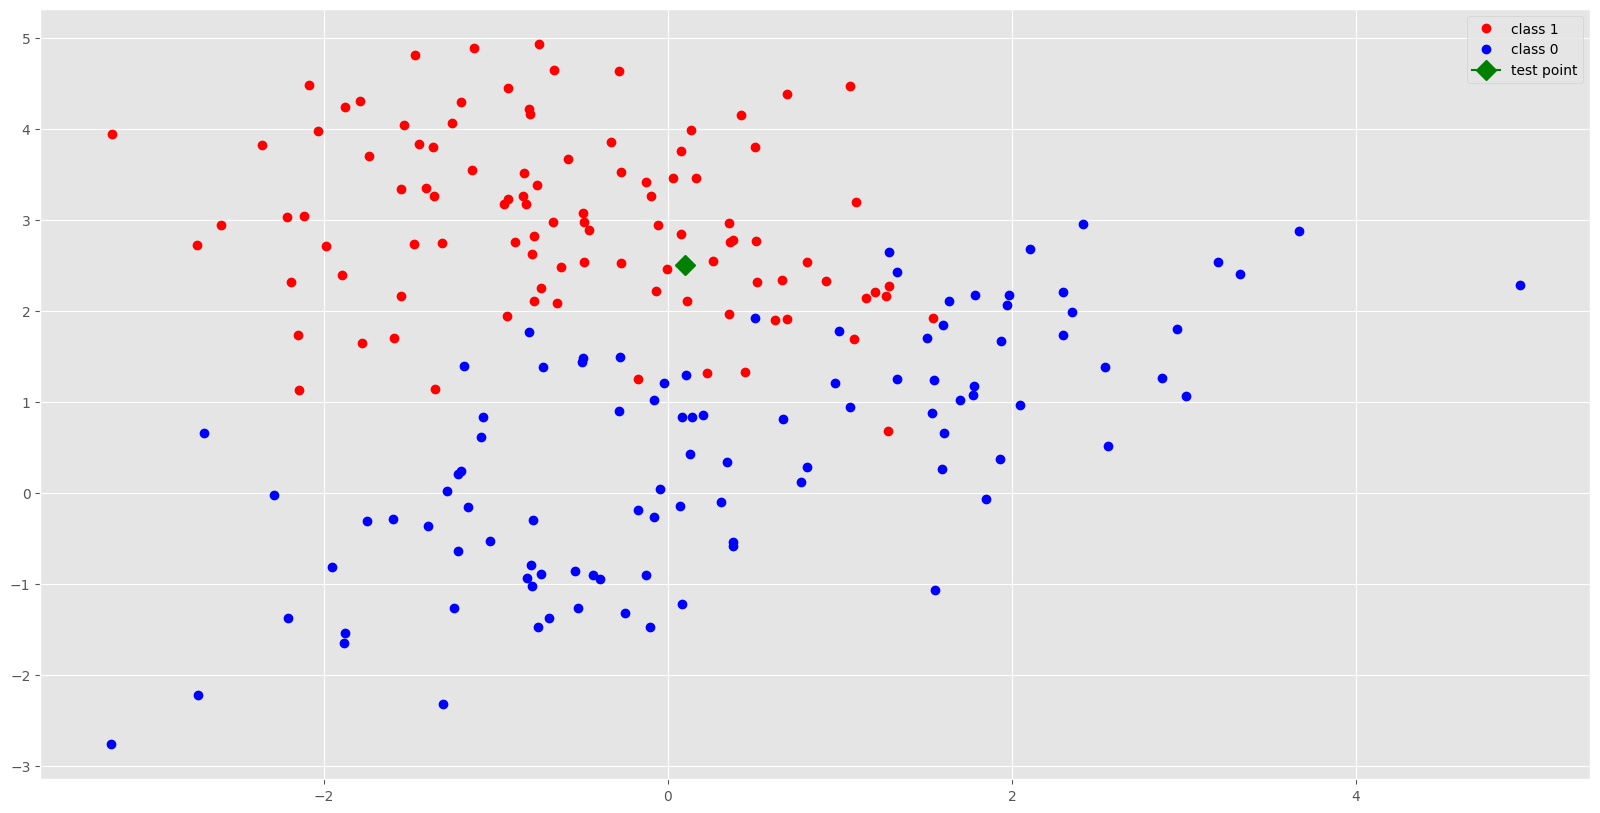

In [10]:
example_2 = np.array([0.1, 2.5])
example_2_tf = tf.constant(example_2)
plt.plot( X1[:, 0], X1[:,1], 'ro', label='class 1')
plt.plot(X2[:, 0], X2[:,1], 'bo', label='class 0')
plt.plot(example_2[0], example_2[1], 'g', marker='D', markersize=10, label='test point')
plt.legend(loc='best')
plt.show()

In [20]:
pr = predict(X_tf, y_tf, example_2_tf, k_tf)
y_index = sess.run(pr)
print (get_label(y_index))

1



1. **New Test Point**:
   - Define a new test point `example_2` at `[0.1, 2.5]` and convert it to a TensorFlow constant `example_2_tf`.
   
2. **Plot**:
   - Plot the data points and the new test point.
   - Use green diamond marker for the test point.

3. **Prediction**:
   - Run the `predict` function to get the labels of the nearest neighbors.
   - Retrieve and print the predicted label for the new test point.

### Step 1.5. To submit your knn.ipynb as a PDF file
jupyter nbconvert --to html knn.ipynb
Print knn.html on a Chrome browser

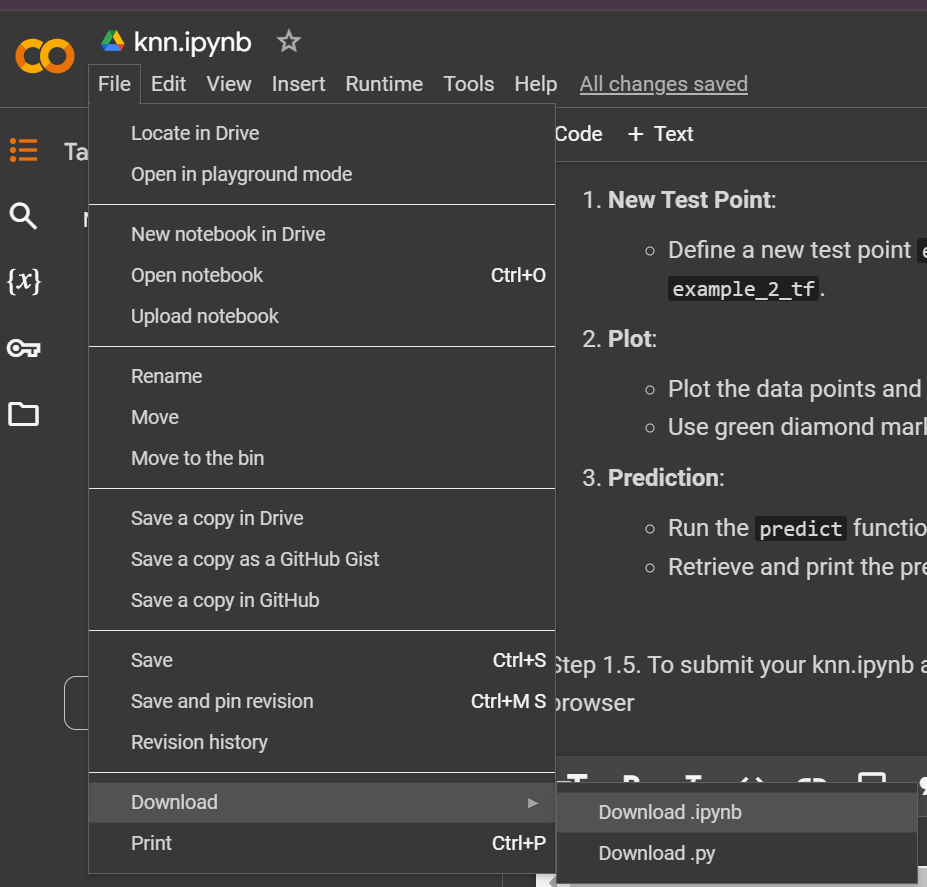

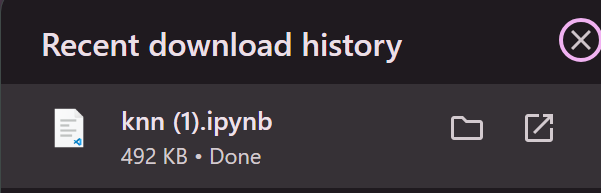

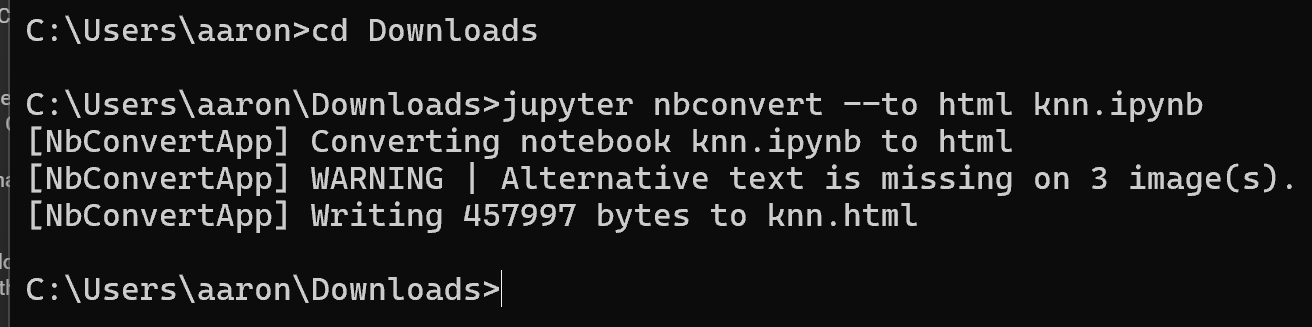

## Step 1.6. Save on GitHub


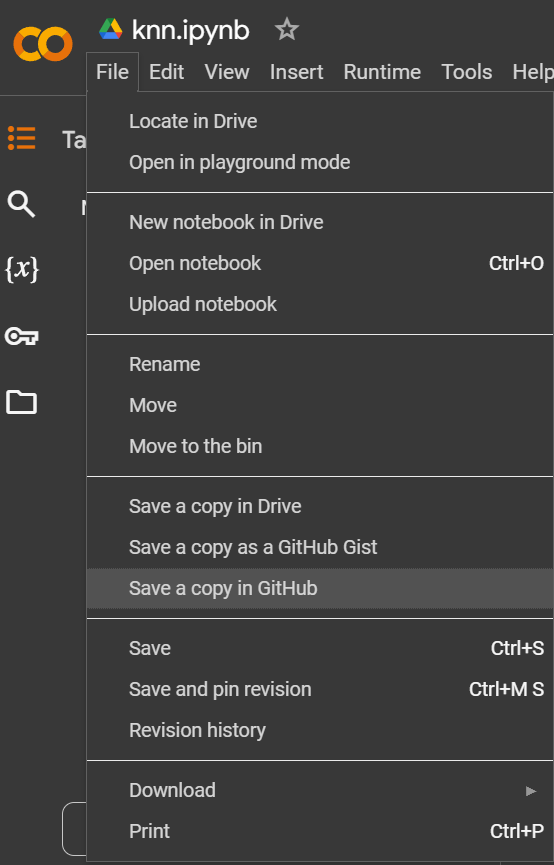